# Visualizando Dados com Matplotlib e Seaborn

Vamos começar importando as bibliotecas necessárias para trabalharmos

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [8]:
tips = sns.load_dataset('tips')

In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [57]:
tips['size'].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

In [63]:
tips['tip'].head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [64]:
tips['tip'].mean()

2.9982786885245902

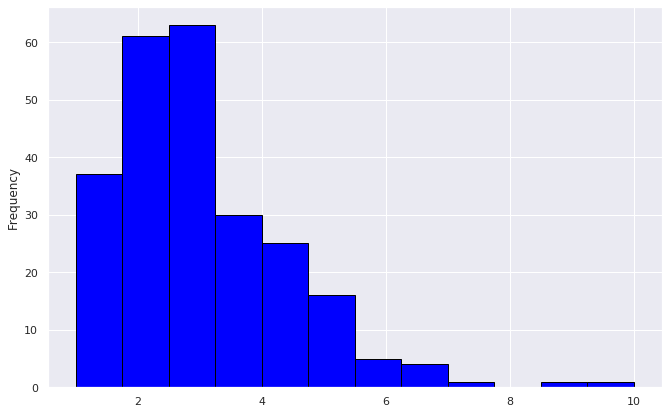

In [62]:
tips.tip.plot(kind='hist', bins=12, figsize=(11,7), color='blue', edgecolor='black')

In [16]:
cts = tips.smoker.value_counts()

In [17]:
cts

No     151
Yes     93
Name: smoker, dtype: int64

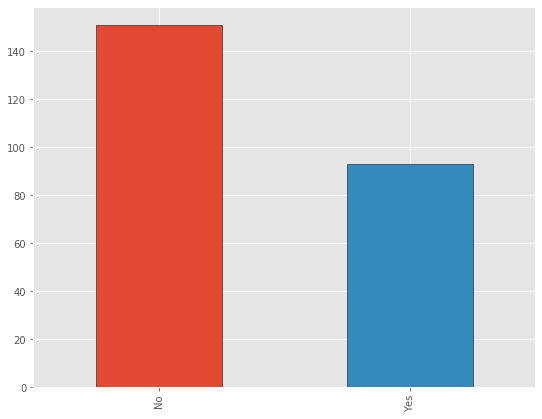

In [22]:
cts.plot(kind='bar', figsize=(9,7), edgecolor='black')

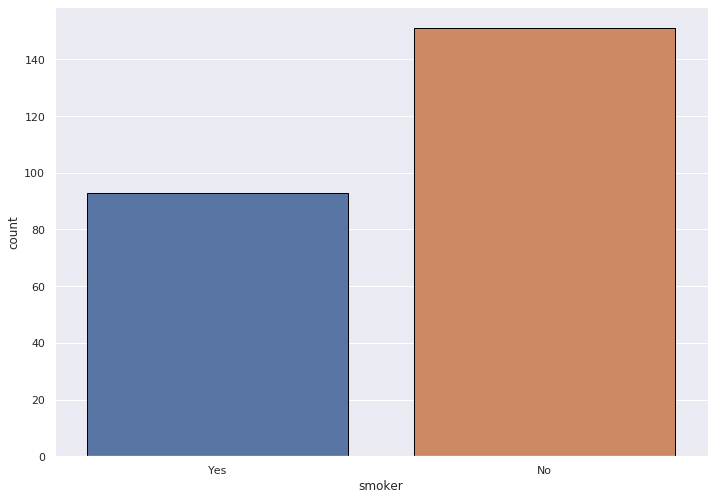

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='smoker', data=tips, edgecolor='black')

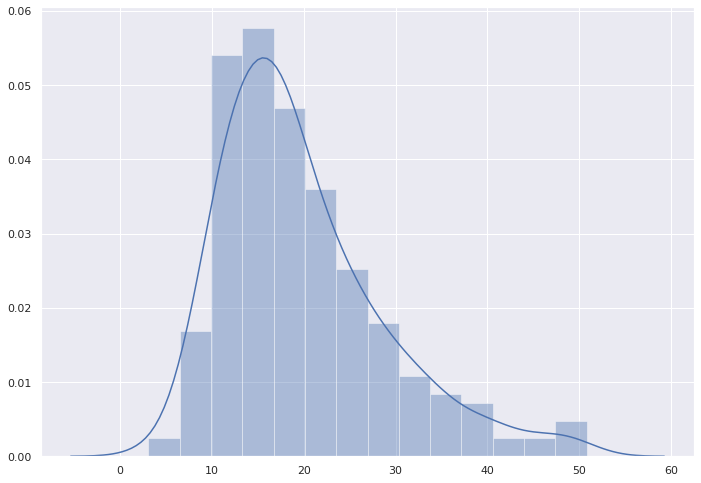

In [31]:
sns.distplot((tips.total_bill,),)

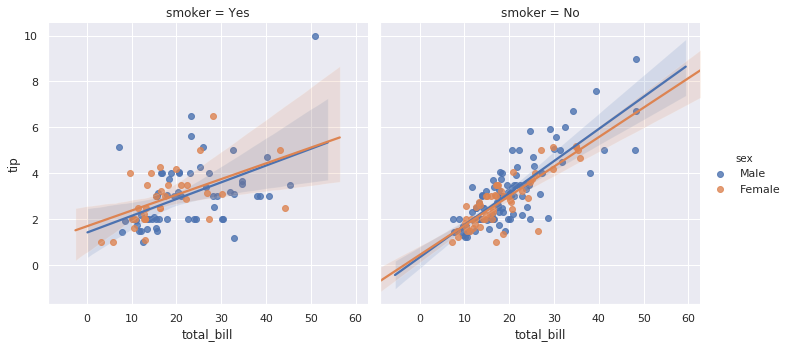

In [32]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', col='smoker')

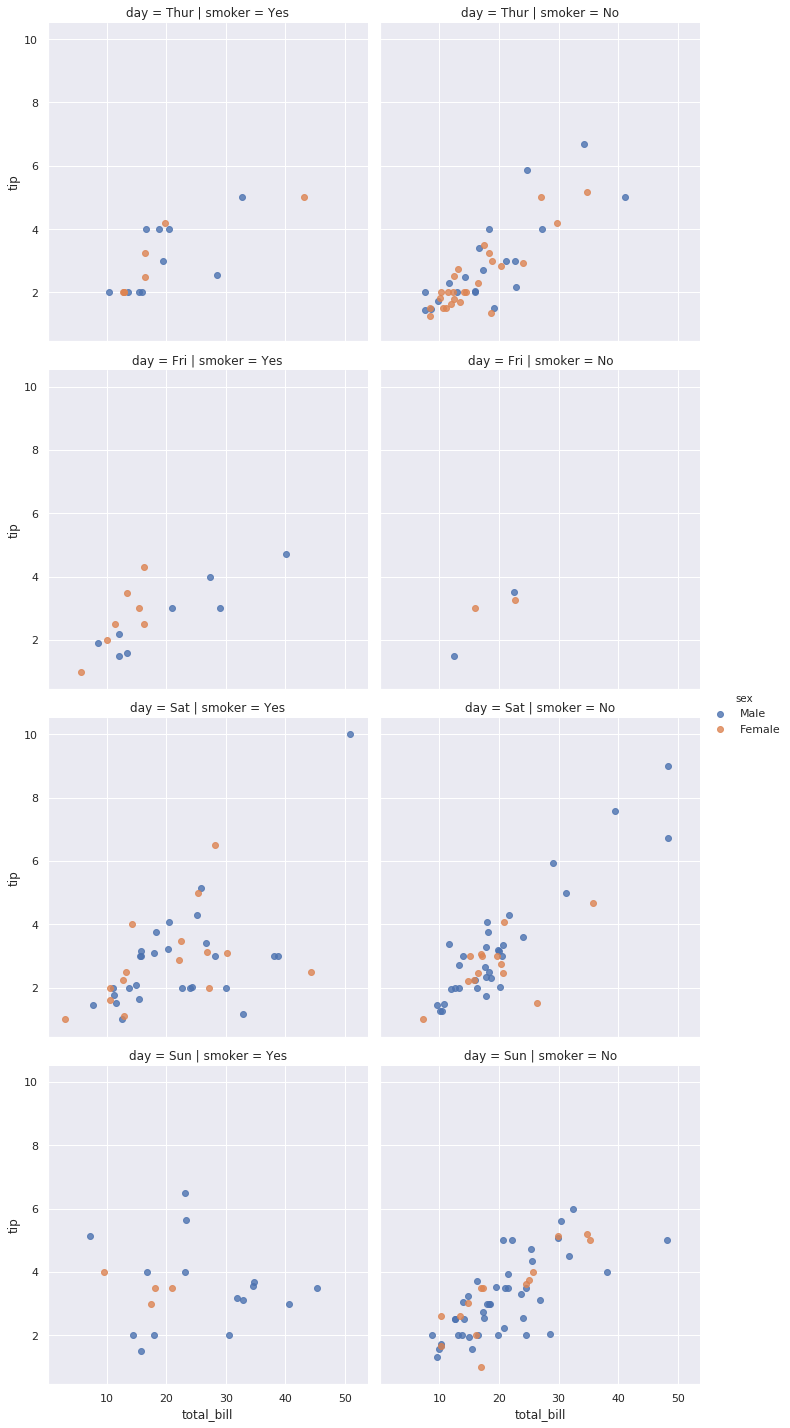

In [33]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', col='smoker', row='day', fit_reg=False)

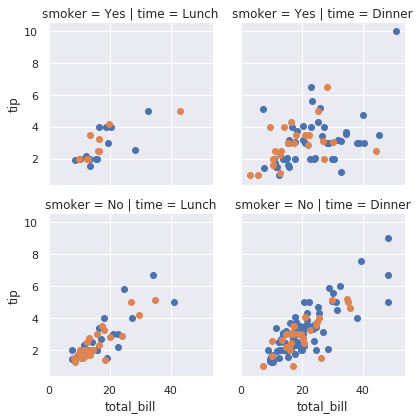

In [52]:
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet.map(plt.scatter, 'total_bill', 'tip')

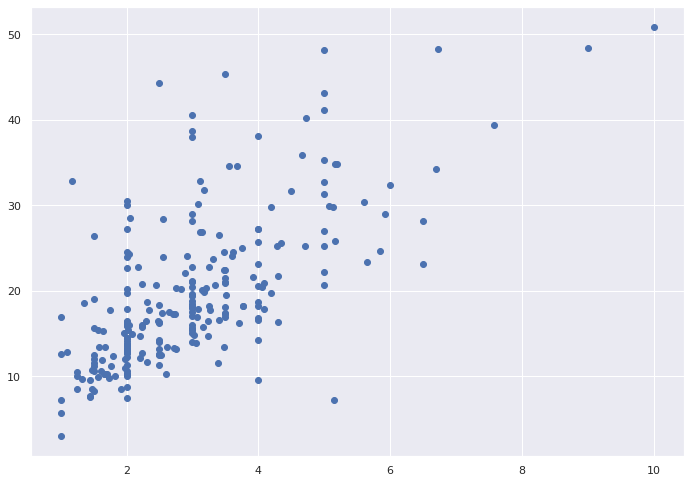

In [35]:
fig, (ax) = plt.subplots(1, 1)
ax.scatter(tips.tip, tips.total_bill)

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

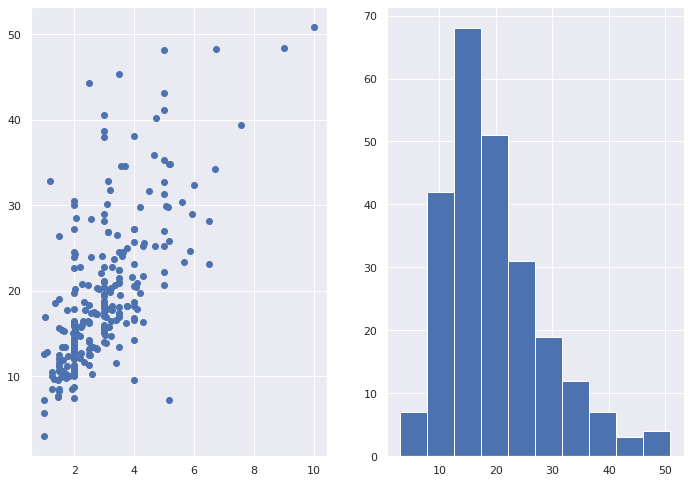

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(tips.tip, tips.total_bill)
ax2.hist(tips.total_bill)

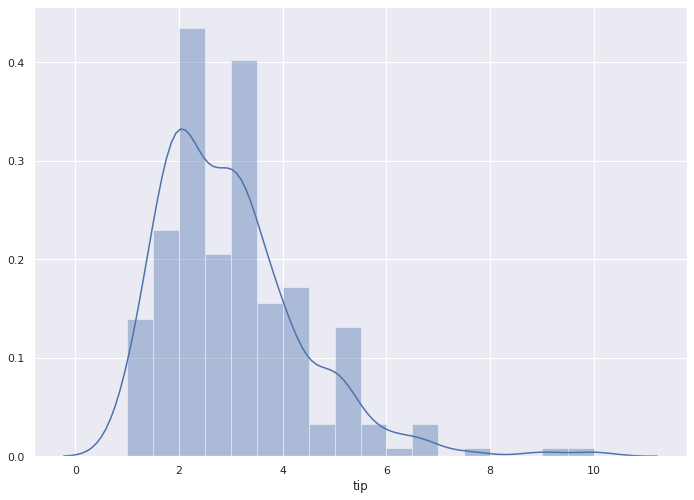

In [37]:
dis = sns.distplot(tips.tip)

In [38]:
type(dis)

matplotlib.axes._subplots.AxesSubplot

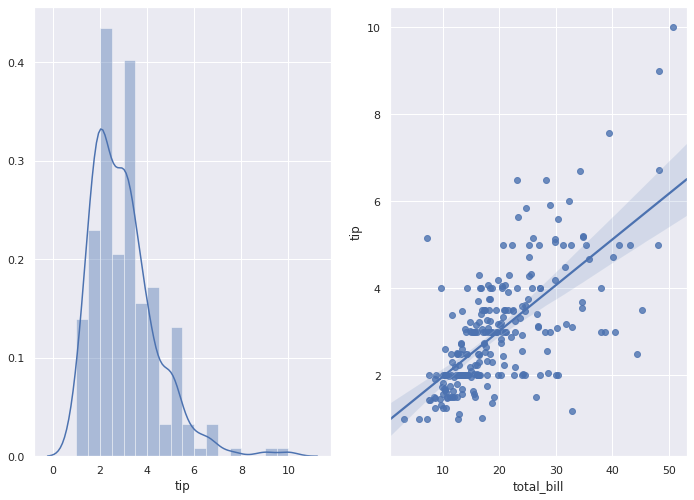

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.distplot(tips.tip, ax=ax1)
sns.regplot(x='total_bill', y='tip', data=tips, ax=ax2)

In [40]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


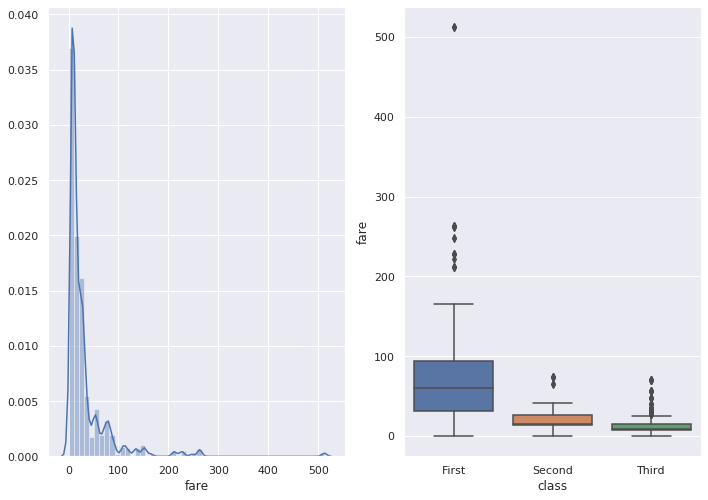

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2) # Criando uma figura com dois subplots
sns.distplot(titanic.fare, ax=ax1)
sns.boxplot(x='class', y='fare', data=titanic, ax=ax2)

In [42]:
from sklearn import linear_model

In [43]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [44]:
lr = linear_model.LinearRegression()

In [45]:
lr.fit(X=tips[['total_bill', 'size']], y=tips['tip'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
lr.coef_

array([0.09271334, 0.19259779])

In [47]:
lr.intercept_

0.6689447408125027

In [48]:
# dummy encoding
# one-hot encoding
# Convertendo valores categóricos para números
pd.get_dummies(tips).head(10)

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
5,25.29,4.71,4,1,0,0,1,0,0,0,1,0,1
6,8.77,2.00,2,1,0,0,1,0,0,0,1,0,1
7,26.88,3.12,4,1,0,0,1,0,0,0,1,0,1
8,15.04,1.96,2,1,0,0,1,0,0,0,1,0,1
9,14.78,3.23,2,1,0,0,1,0,0,0,1,0,1


In [49]:
tips_dummy = pd.get_dummies(tips, drop_first=True)
tips_dummy.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1


In [50]:
lr = linear_model.LinearRegression()
lr.fit(X=tips_dummy.iloc[:, 2:], y=tips['tip'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
lr.coef_

array([ 0.71001644, -0.10057881, -0.20916402, -0.20180568, -0.36603136,
       -0.29452609,  0.48575489])